🎨 GERANDO FLUXOGRAMAS...


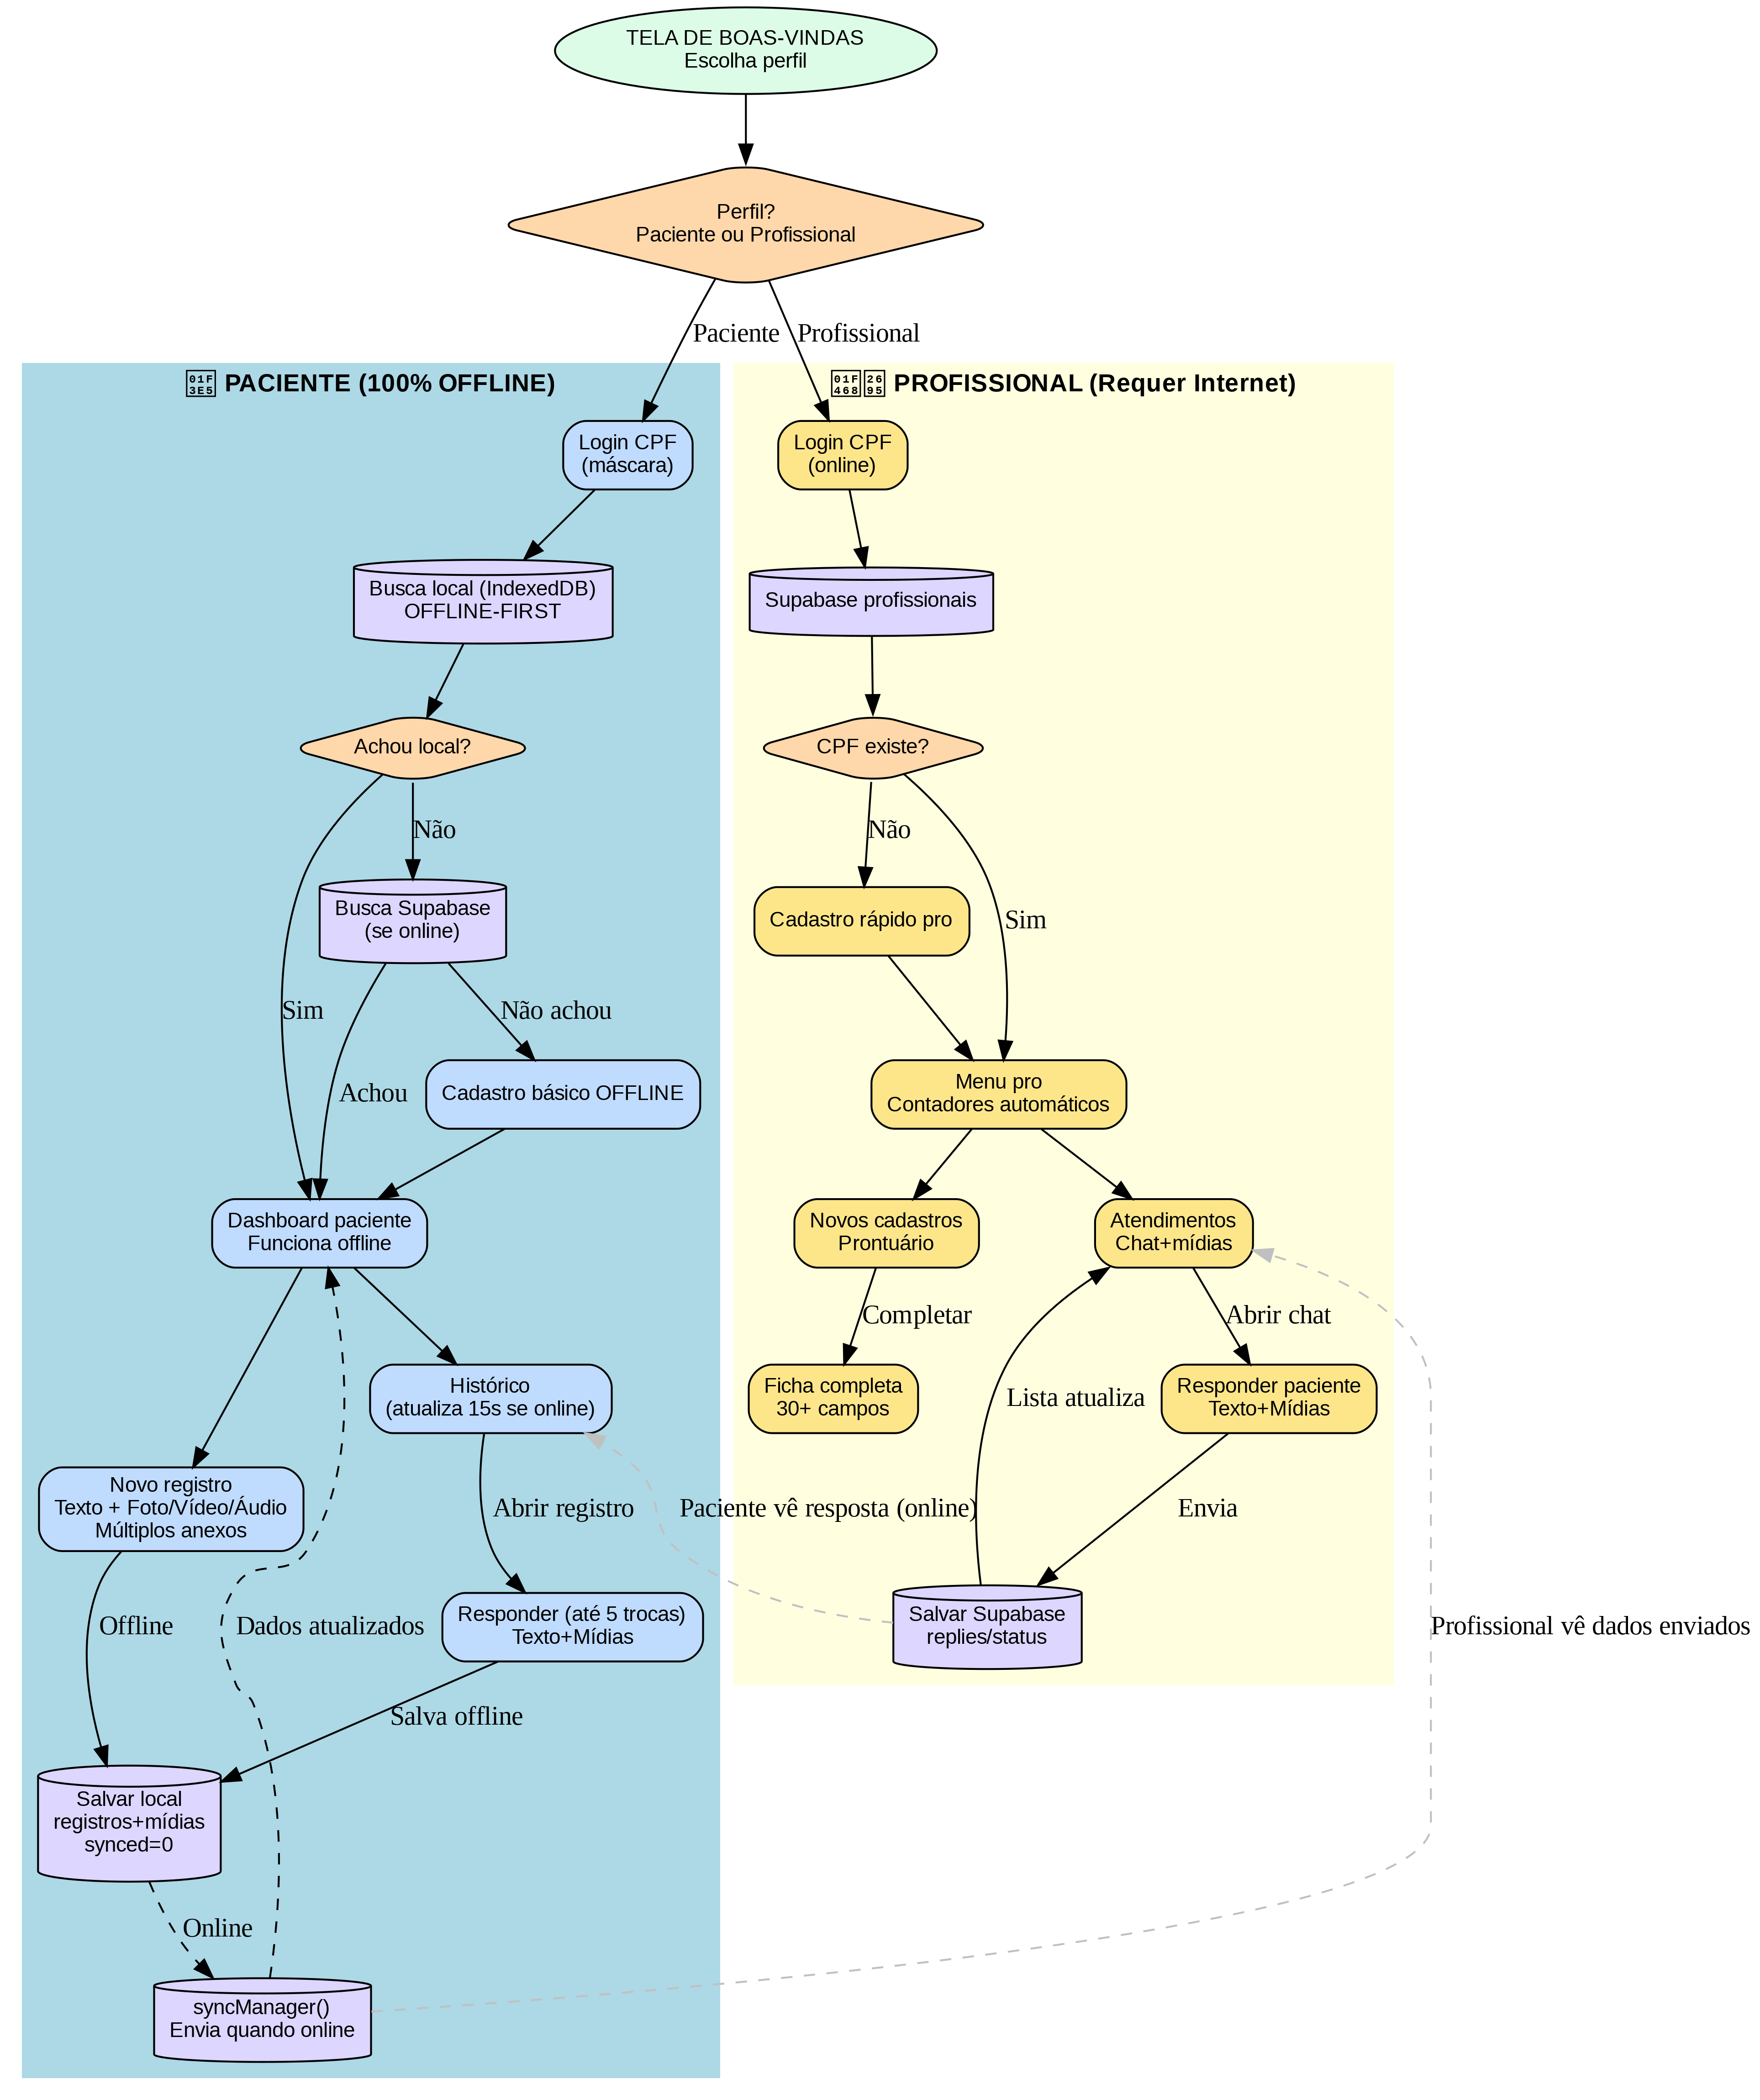

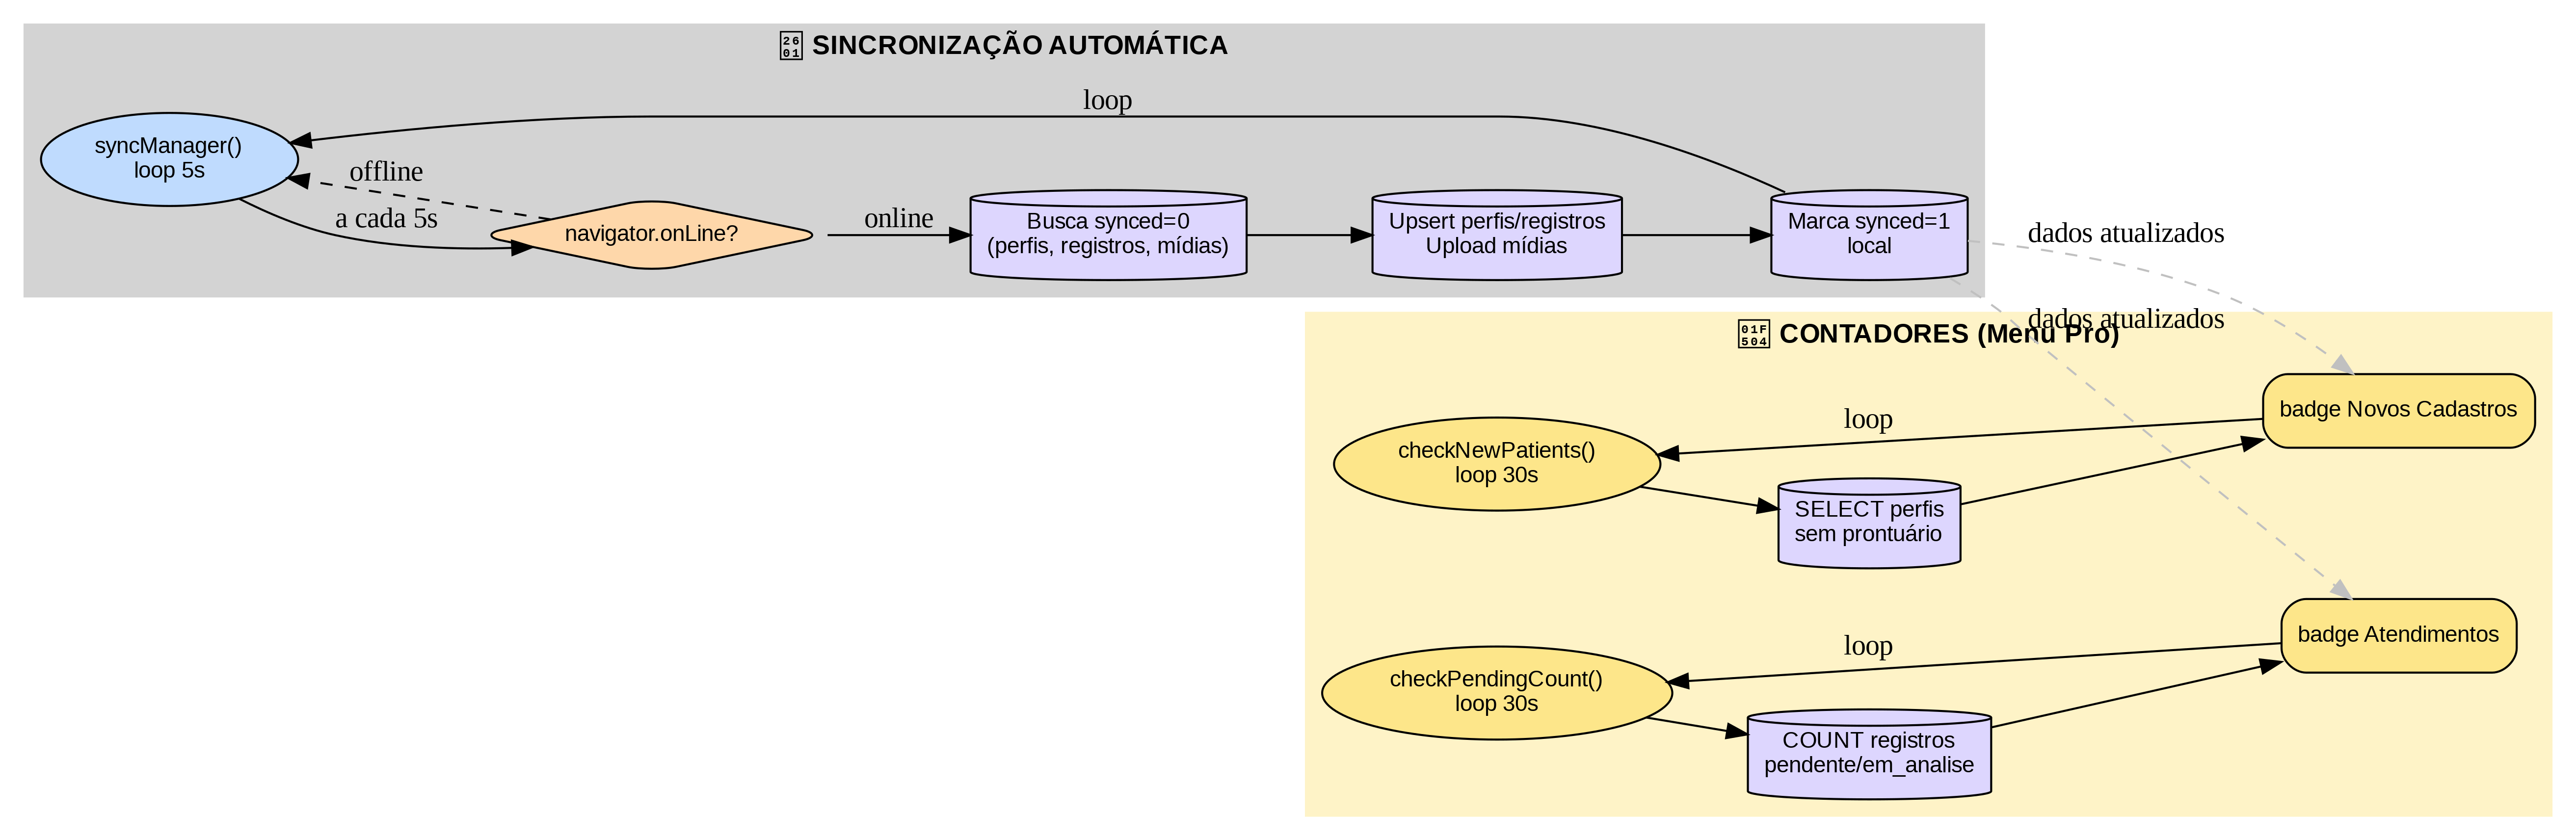


🏗️ GERANDO ARQUITETURA TÉCNICA...


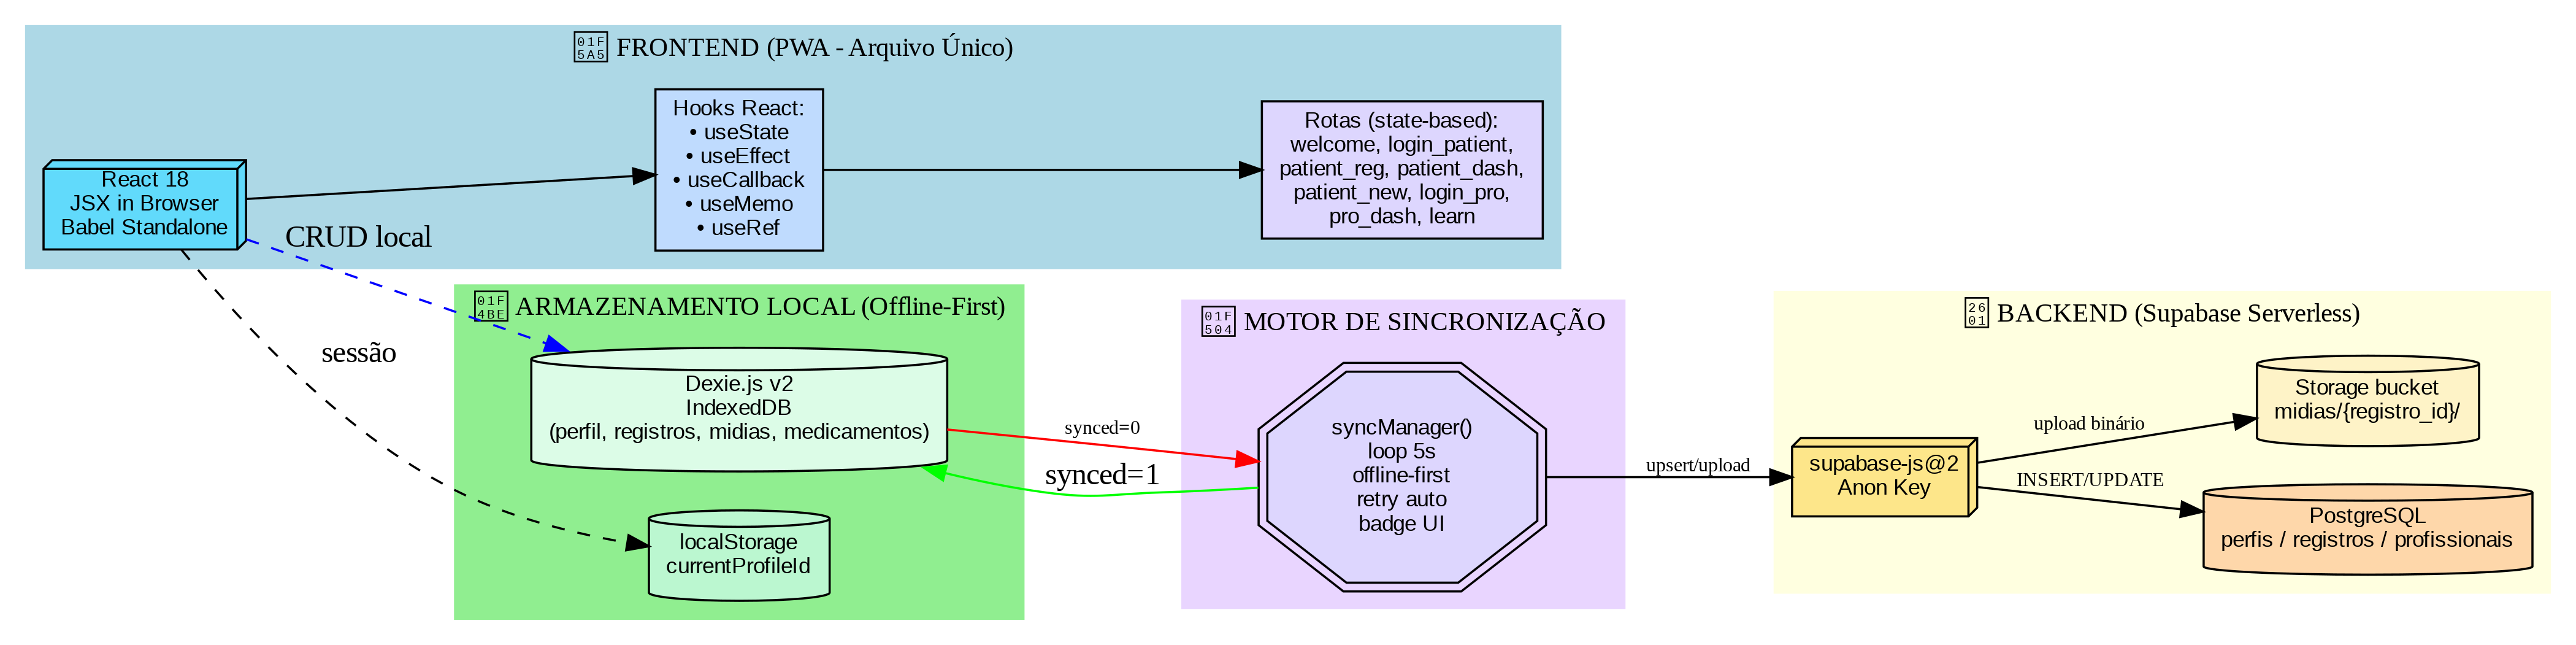


📊 GERANDO MODELO DE DADOS...


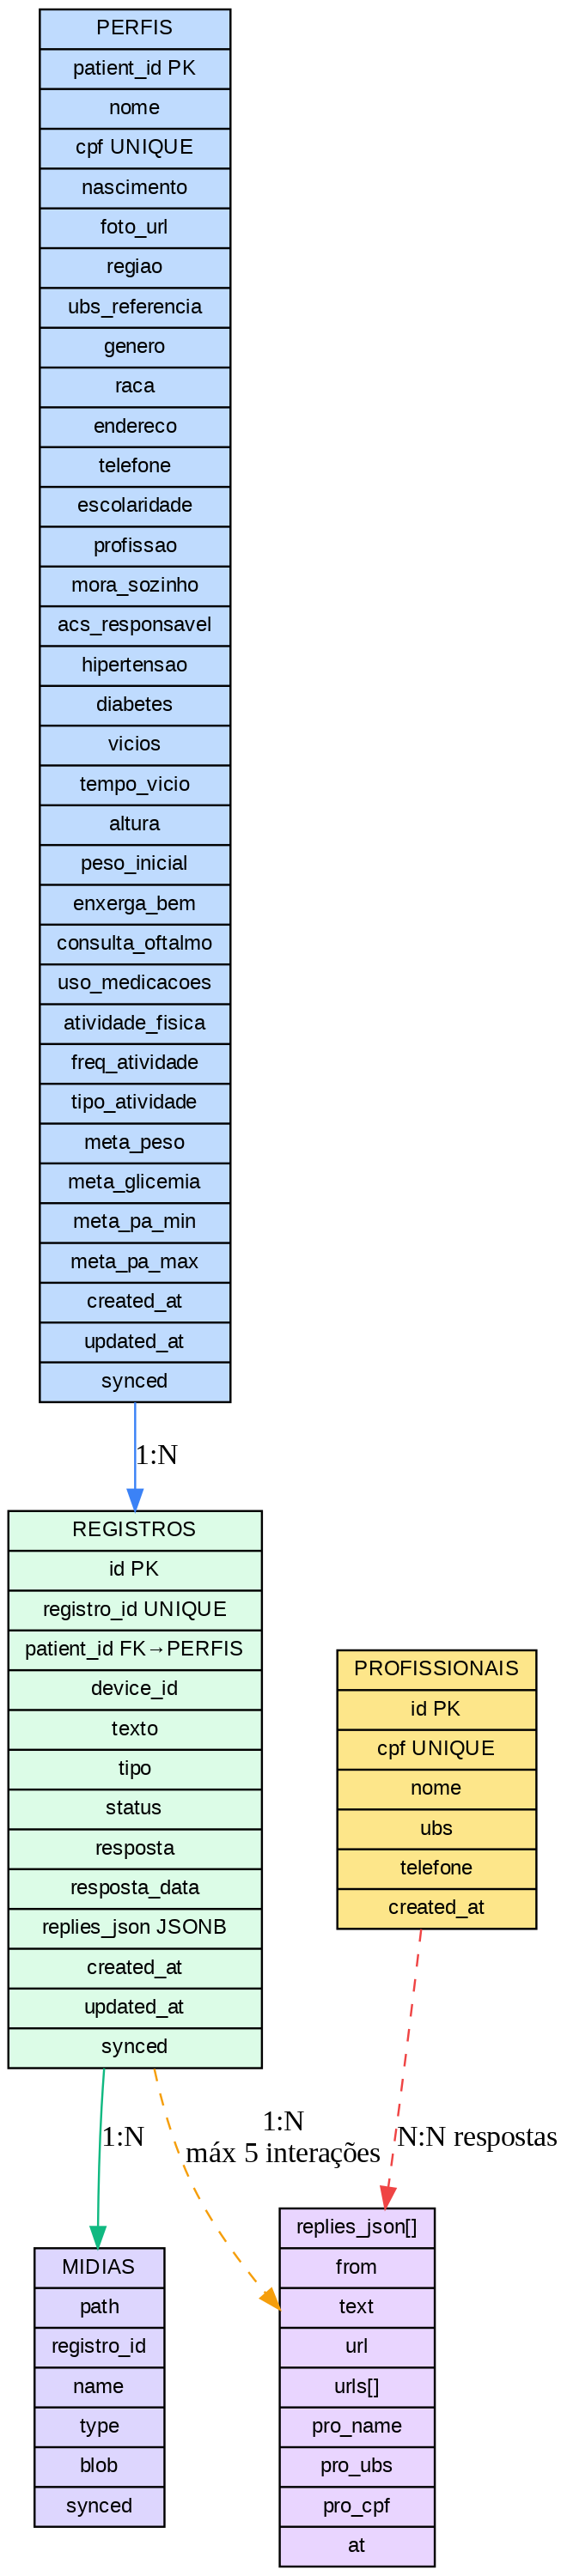


🧩 GERANDO STACK DE LINGUAGENS/TECH...


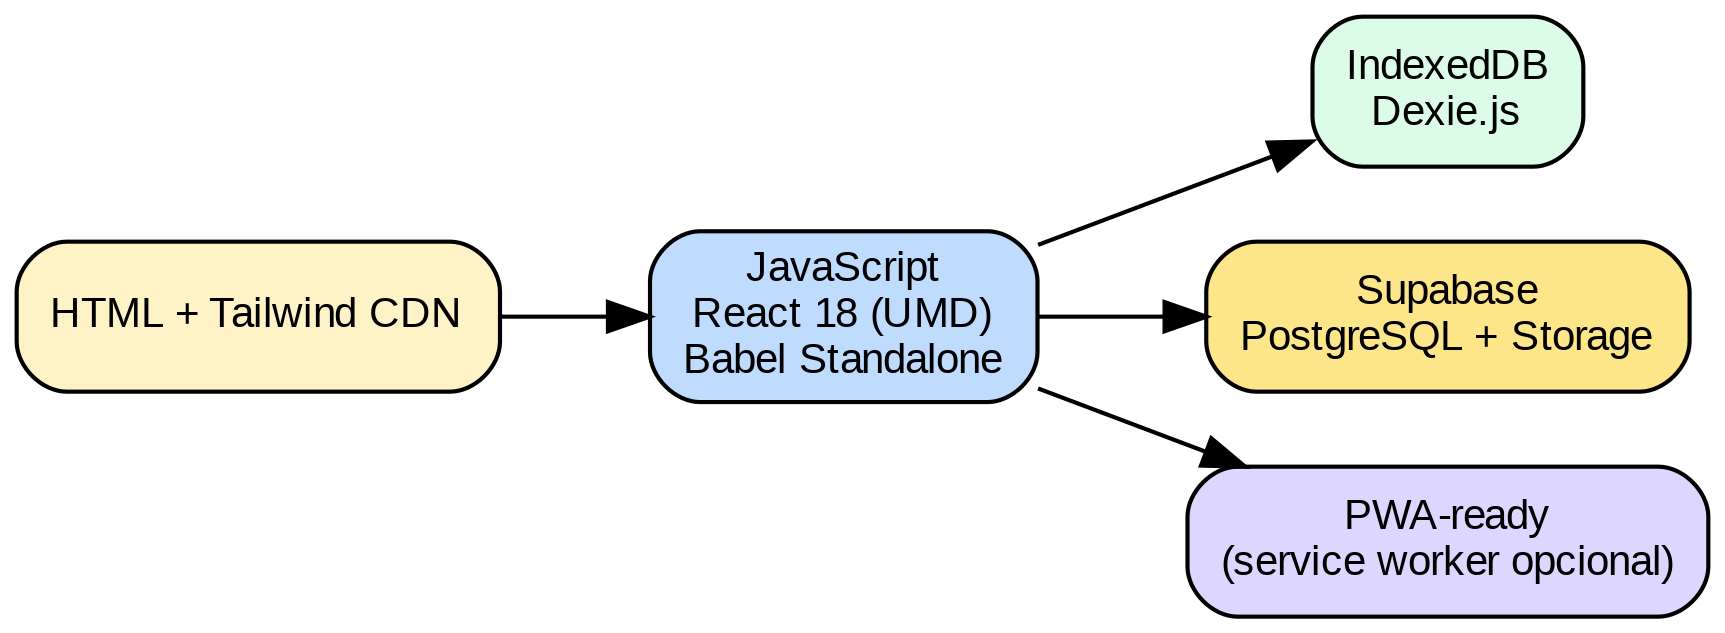

In [9]:
import graphviz
from IPython.display import display, Image

def criar_fluxo_parte1():
    dot = graphviz.Digraph(comment='Fluxo Paciente/Profissional - Parte 1', format='png')
    dot.attr(rankdir='TB', dpi='300')
    dot.attr('node', shape='box', style='rounded,filled', fontname='Arial', fontsize='11')
    COR_INICIO='#dcfce7'; COR_PAC='#bfdbfe'; COR_PRO='#fde68a'; COR_BAN='#ddd6fe'; COR_DEC='#fed7aa'

    dot.node('A','TELA DE BOAS-VINDAS\nEscolha perfil', fillcolor=COR_INICIO, shape='ellipse')
    dot.node('B','Perfil?\nPaciente ou Profissional', fillcolor=COR_DEC, shape='diamond')
    dot.edge('A','B')

    with dot.subgraph(name='cluster_paciente') as c:
        c.attr(label='🏥 PACIENTE (100% OFFLINE)', style='filled', color='lightblue', fontsize='13', fontname='Arial Bold')
        c.node('P1','Login CPF\n(máscara)', fillcolor=COR_PAC)
        c.node('P2','Busca local (IndexedDB)\nOFFLINE-FIRST', fillcolor=COR_BAN, shape='cylinder')
        c.node('P3','Achou local?', fillcolor=COR_DEC, shape='diamond')
        c.node('P4','Busca Supabase\n(se online)', fillcolor=COR_BAN, shape='cylinder')
        c.node('P5','Cadastro básico OFFLINE', fillcolor=COR_PAC)
        c.node('P6','Dashboard paciente\nFunciona offline', fillcolor=COR_PAC)
        c.node('P7','Novo registro\nTexto + Foto/Vídeo/Áudio\nMúltiplos anexos', fillcolor=COR_PAC)
        c.node('P8','Salvar local\nregistros+mídias\nsynced=0', fillcolor=COR_BAN, shape='cylinder')
        c.node('P9','syncManager()\nEnvia quando online', fillcolor=COR_BAN, shape='cylinder')
        c.node('P10','Histórico\n(atualiza 15s se online)', fillcolor=COR_PAC)
        c.node('P11','Responder (até 5 trocas)\nTexto+Mídias', fillcolor=COR_PAC)
        dot.edge('B','P1', label='Paciente')
        dot.edge('P1','P2'); dot.edge('P2','P3'); dot.edge('P3','P6', label='Sim')
        dot.edge('P3','P4', label='Não'); dot.edge('P4','P6', label='Achou'); dot.edge('P4','P5', label='Não achou')
        dot.edge('P5','P6'); dot.edge('P6','P7'); dot.edge('P7','P8', label='Offline')
        dot.edge('P8','P9', style='dashed', label='Online'); dot.edge('P9','P6', style='dashed', label='Dados atualizados')
        dot.edge('P6','P10'); dot.edge('P10','P11', label='Abrir registro'); dot.edge('P11','P8', label='Salva offline')

    with dot.subgraph(name='cluster_pro') as c:
        c.attr(label='👨‍⚕️ PROFISSIONAL (Requer Internet)', style='filled', color='lightyellow', fontsize='13', fontname='Arial Bold')
        c.node('F1','Login CPF\n(online)', fillcolor=COR_PRO)
        c.node('F2','Supabase profissionais', fillcolor=COR_BAN, shape='cylinder')
        c.node('F3','CPF existe?', fillcolor=COR_DEC, shape='diamond')
        c.node('F4','Cadastro rápido pro', fillcolor=COR_PRO)
        c.node('F5','Menu pro\nContadores automáticos', fillcolor=COR_PRO)
        c.node('F6','Atendimentos\nChat+mídias', fillcolor=COR_PRO)
        c.node('F7','Novos cadastros\nProntuário', fillcolor=COR_PRO)
        c.node('F8','Ficha completa\n30+ campos', fillcolor=COR_PRO)
        c.node('F9','Responder paciente\nTexto+Mídias', fillcolor=COR_PRO)
        c.node('F10','Salvar Supabase\nreplies/status', fillcolor=COR_BAN, shape='cylinder')
        dot.edge('B','F1', label='Profissional'); dot.edge('F1','F2'); dot.edge('F2','F3')
        dot.edge('F3','F5', label='Sim'); dot.edge('F3','F4', label='Não'); dot.edge('F4','F5')
        dot.edge('F5','F6'); dot.edge('F5','F7')
        dot.edge('F7','F8', label='Completar'); dot.edge('F6','F9', label='Abrir chat'); dot.edge('F9','F10', label='Envia')
        dot.edge('F10','F6', label='Lista atualiza')

    dot.edge('P9','F6', style='dashed', color='gray', label='Profissional vê dados enviados')
    dot.edge('F10','P10', style='dashed', color='gray', label='Paciente vê resposta (online)')

    return dot

def criar_fluxo_parte2():
    dot = graphviz.Digraph(comment='Sync + Contadores', format='png')
    dot.attr(rankdir='LR', dpi='300')
    dot.attr('node', shape='box', style='rounded,filled', fontname='Arial', fontsize='11')
    COR_BAN='#ddd6fe'; COR_DEC='#fed7aa'

    with dot.subgraph(name='cluster_sync') as c:
        c.attr(label='☁️ SINCRONIZAÇÃO AUTOMÁTICA', style='filled', color='lightgray', fontsize='13', fontname='Arial Bold')
        c.node('S1','syncManager()\nloop 5s', fillcolor='#bfdbfe', shape='ellipse')
        c.node('S2','navigator.onLine?', fillcolor=COR_DEC, shape='diamond')
        c.node('S3','Busca synced=0\n(perfis, registros, mídias)', fillcolor=COR_BAN, shape='cylinder')
        c.node('S4','Upsert perfis/registros\nUpload mídias', fillcolor=COR_BAN, shape='cylinder')
        c.node('S5','Marca synced=1\nlocal', fillcolor=COR_BAN, shape='cylinder')
        c.edge('S1','S2', label='a cada 5s'); c.edge('S2','S3', label='online'); c.edge('S2','S1', style='dashed', label='offline')
        c.edge('S3','S4'); c.edge('S4','S5'); c.edge('S5','S1', label='loop')

    with dot.subgraph(name='cluster_count') as c:
        c.attr(label='🔄 CONTADORES (Menu Pro)', style='filled', color='#fef3c7', fontsize='13', fontname='Arial Bold')
        c.node('C1','checkNewPatients()\nloop 30s', fillcolor='#fde68a', shape='ellipse')
        c.node('C2','SELECT perfis\nsem prontuário', fillcolor=COR_BAN, shape='cylinder')
        c.node('C3','badge Novos Cadastros', fillcolor='#fde68a')
        c.node('C4','checkPendingCount()\nloop 30s', fillcolor='#fde68a', shape='ellipse')
        c.node('C5','COUNT registros\npendente/em_analise', fillcolor=COR_BAN, shape='cylinder')
        c.node('C6','badge Atendimentos', fillcolor='#fde68a')
        c.edge('C1','C2'); c.edge('C2','C3'); c.edge('C3','C1', label='loop')
        c.edge('C4','C5'); c.edge('C5','C6'); c.edge('C6','C4', label='loop')

    dot.edge('S5','C3', style='dashed', color='gray', label='dados atualizados')
    dot.edge('S5','C6', style='dashed', color='gray', label='dados atualizados')
    return dot

def criar_fluxograma_principal():
    f1 = criar_fluxo_parte1()
    f2 = criar_fluxo_parte2()
    f1.render('tecendo_saude_final_parte1', cleanup=True)
    f2.render('tecendo_saude_final_parte2', cleanup=True)
    display(Image('tecendo_saude_final_parte1.png'))
    display(Image('tecendo_saude_final_parte2.png'))

def criar_arquitetura():
    dot = graphviz.Digraph(comment='Arquitetura Técnica', format='png')
    dot.attr(rankdir='LR', size='14,10', dpi='300')
    dot.attr('node', fontname='Arial', fontsize='10')
    with dot.subgraph(name='cluster_frontend') as c:
        c.attr(label='🖥️ FRONTEND (PWA - Arquivo Único)', style='filled', color='lightblue', fontsize='12')
        c.node('UI', 'React 18\nJSX in Browser\nBabel Standalone', shape='box3d', fillcolor='#61dafb', style='filled')
        c.node('STATE', 'Hooks React:\n• useState\n• useEffect\n• useCallback\n• useMemo\n• useRef', shape='box', fillcolor='#bfdbfe', style='filled')
        c.node('ROUTER', 'Rotas (state-based):\nwelcome, login_patient,\npatient_reg, patient_dash,\npatient_new, login_pro,\npro_dash, learn', shape='box', fillcolor='#ddd6fe', style='filled')
    with dot.subgraph(name='cluster_storage') as c:
        c.attr(label='💾 ARMAZENAMENTO LOCAL (Offline-First)', style='filled', color='lightgreen', fontsize='12')
        c.node('DEXIE', 'Dexie.js v2\nIndexedDB\n(perfil, registros, midias, medicamentos)', shape='cylinder', fillcolor='#dcfce7', style='filled')
        c.node('LOCAL', 'localStorage\ncurrentProfileId', shape='cylinder', fillcolor='#bbf7d0', style='filled')
    with dot.subgraph(name='cluster_backend') as c:
        c.attr(label='☁️ BACKEND (Supabase Serverless)', style='filled', color='lightyellow', fontsize='12')
        c.node('SUPA', 'supabase-js@2\nAnon Key', shape='box3d', fillcolor='#fde68a', style='filled')
        c.node('DB', 'PostgreSQL\nperfis / registros / profissionais', shape='cylinder', fillcolor='#fed7aa', style='filled')
        c.node('STORAGE', 'Storage bucket\nmidias/{registro_id}/', shape='cylinder', fillcolor='#fef3c7', style='filled')
    with dot.subgraph(name='cluster_sync') as c:
        c.attr(label='🔄 MOTOR DE SINCRONIZAÇÃO', style='filled', color='#e9d5ff', fontsize='12')
        c.node('SYNC', 'syncManager()\nloop 5s\noffline-first\nretry auto\nbadge UI', shape='doubleoctagon', fillcolor='#ddd6fe', style='filled')
    dot.edge('UI','STATE'); dot.edge('STATE','ROUTER')
    dot.edge('UI','DEXIE', label='CRUD local', style='dashed', color='blue')
    dot.edge('UI','LOCAL', label='sessão', style='dashed')
    dot.edge('DEXIE','SYNC', label='synced=0', color='red', fontsize='9')
    dot.edge('SYNC','SUPA', label='upsert/upload', fontsize='9')
    dot.edge('SUPA','DB', label='INSERT/UPDATE', fontsize='9')
    dot.edge('SUPA','STORAGE', label='upload binário', fontsize='9')
    dot.edge('SYNC','DEXIE', label='synced=1', color='green')
    return dot

def criar_modelo_dados():
    dot = graphviz.Digraph(comment='Modelo de Dados', format='png')
    dot.attr(rankdir='TB', size='12,10', dpi='300')
    dot.attr('node', shape='record', fontname='Arial', fontsize='10')
    dot.node('PERFIS', '{PERFIS|patient_id PK|nome|cpf UNIQUE|nascimento|foto_url|regiao|ubs_referencia|genero|raca|endereco|telefone|escolaridade|profissao|mora_sozinho|acs_responsavel|hipertensao|diabetes|vicios|tempo_vicio|altura|peso_inicial|enxerga_bem|consulta_oftalmo|uso_medicacoes|atividade_fisica|freq_atividade|tipo_atividade|meta_peso|meta_glicemia|meta_pa_min|meta_pa_max|created_at|updated_at|synced}', fillcolor='#bfdbfe', style='filled')
    dot.node('REG', '{REGISTROS|id PK|registro_id UNIQUE|patient_id FK→PERFIS|device_id|texto|tipo|status|resposta|resposta_data|replies_json JSONB|created_at|updated_at|synced}', fillcolor='#dcfce7', style='filled')
    dot.node('PRO', '{PROFISSIONAIS|id PK|cpf UNIQUE|nome|ubs|telefone|created_at}', fillcolor='#fde68a', style='filled')
    dot.node('MID', '{MIDIAS|path|registro_id|name|type|blob|synced}', fillcolor='#ddd6fe', style='filled')
    dot.node('REP', '{replies_json[]|from|text|url|urls[]|pro_name|pro_ubs|pro_cpf|at}', fillcolor='#e9d5ff', style='filled')
    dot.edge('PERFIS','REG', label='1:N', color='#3b82f6')
    dot.edge('REG','MID', label='1:N', color='#10b981')
    dot.edge('REG','REP', label='1:N\nmáx 5 interações', style='dashed', color='#f59e0b')
    dot.edge('PRO','REP', label='N:N respostas', style='dashed', color='#ef4444')
    return dot

def criar_stack_linguagens():
    dot = graphviz.Digraph(comment='Stack de Linguagens/Tech', format='png')
    dot.attr(rankdir='LR', dpi='300')
    dot.attr('node', shape='box', style='rounded,filled', fontname='Arial', fontsize='10')
    dot.node('HTML','HTML + Tailwind CDN', fillcolor='#fef3c7')
    dot.node('JS','JavaScript\nReact 18 (UMD)\nBabel Standalone', fillcolor='#bfdbfe')
    dot.node('DBL','IndexedDB\nDexie.js', fillcolor='#dcfce7')
    dot.node('CLOUD','Supabase\nPostgreSQL + Storage', fillcolor='#fde68a')
    dot.node('PWA','PWA-ready\n(service worker opcional)', fillcolor='#ddd6fe')
    dot.edges([('HTML','JS'),('JS','DBL'),('JS','CLOUD'),('JS','PWA')])
    return dot

print("🎨 GERANDO FLUXOGRAMAS...")
criar_fluxograma_principal()

print("\n🏗️ GERANDO ARQUITETURA TÉCNICA...")
arq = criar_arquitetura()
arq.render('tecendo_saude_arquitetura', format='png', cleanup=True)
display(Image('tecendo_saude_arquitetura.png'))

print("\n📊 GERANDO MODELO DE DADOS...")
modelo = criar_modelo_dados()
modelo.render('tecendo_saude_modelo', format='png', cleanup=True)
display(Image('tecendo_saude_modelo.png'))

print("\n🧩 GERANDO STACK DE LINGUAGENS/TECH...")
stack = criar_stack_linguagens()
stack.render('tecendo_saude_stack', format='png', cleanup=True)
display(Image('tecendo_saude_stack.png'))